### Modelling stock prices using Linear Regression and testing all assumptions of Linear Regression using statistical methods

In [1]:
# Download data from Yahoo Finance
# Some feature engineering - Technical Ondicators
# Run the regression model
# Check how the model is performed
# Test for all assumption
# Check the prediction

In [2]:
# Import necessary libraries

import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import statsmodels.api as sm
import statsmodels.formula.api as smf


In [3]:
# Download stock data from Yahoo Finance

tickers = ['AAPL', 'AMZN', 'MSFT', 'QQQ', '^GSPC']
start_date = '2020-01-01'
end_date = '2024-12-31'

df = yf.download(tickers, start = start_date, end = end_date)['Close']
df

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  5 of 5 completed


Ticker,AAPL,AMZN,MSFT,QQQ,^GSPC
Date,,,,,
2020-01-02,72.620834,94.900497,153.042343,209.325867,3257.850098
2020-01-03,71.914818,93.748497,151.136642,207.408478,3234.850098
2020-01-06,72.487846,95.143997,151.527328,208.744873,3246.280029
2020-01-07,72.146919,95.343002,150.145737,208.715805,3237.179932
2020-01-08,73.307503,94.598503,152.537308,210.284607,3253.050049
...,...,...,...,...,...
2024-12-23,254.655716,225.059998,433.583038,522.091431,5974.069824
2024-12-24,257.578674,229.050003,437.647369,529.170898,6040.040039
2024-12-26,258.396667,227.050003,436.432068,528.811401,6037.589844


In [4]:
# Feature Engineering - Technical Indicators

df['AAPL(t-1)'] = df['AAPL'].shift(1)
df['AMZN(t-1)'] = df['AMZN'].shift(1)
df['MSFT(t-1)'] = df['MSFT'].shift(1)
df['QQQ(t-1)'] = df['QQQ'].shift(1)
df['^GSPC(t-1)'] = df['^GSPC'].shift(1) # The shift(1) considers the previous day's value

# Moving Average
df['AAPL_MA_5'] = df['AAPL'].rolling(window=5).mean()
df['AMZN_MA_5'] = df['AMZN'].rolling(window=5).mean()
df['MSFT_MA_5'] = df['MSFT'].rolling(window=5).mean()
df['QQQ_MA_5'] = df['QQQ'].rolling(window=5).mean()
df['^GSPC_MA_5'] = df['^GSPC'].rolling(window=5).mean()


# Setting variable Y
df['Target'] = df['AAPL'].shift(-1) # The shift(-1) considers the next day's value
df = df.dropna()
df.head()

Ticker,AAPL,AMZN,MSFT,QQQ,^GSPC,AAPL(t-1),AMZN(t-1),MSFT(t-1),QQQ(t-1),^GSPC(t-1),AAPL_MA_5,AMZN_MA_5,MSFT_MA_5,QQQ_MA_5,^GSPC_MA_5,Target
Date,,,,,,,,,,,,,,,,
2020-01-08,73.307503,94.598503,152.537308,210.284607,3253.050049,72.146919,95.343002,150.145737,208.715805,3237.179932,72.495584,94.746899,151.677872,208.895926,3245.842041,74.864624
2020-01-09,74.864624,95.052498,154.442932,212.066437,3274.699951,73.307503,94.598503,152.537308,210.284607,3253.050049,72.944342,94.777299,151.957990,209.444040,3249.212012,75.033859
2020-01-10,75.033859,94.157997,153.728333,211.524124,3265.350098,74.864624,95.052498,154.442932,212.066437,3274.699951,73.568150,94.859200,152.476328,210.267169,3255.312012,76.636909
2020-01-13,76.636909,94.565002,155.576797,213.964462,3288.129883,75.033859,94.157997,153.728333,211.524124,3265.350098,74.397963,94.743401,153.286221,211.311087,3263.681982,75.602081
2020-01-14,75.602081,93.472000,154.481049,213.121948,3283.149902,76.636909,94.565002,155.576797,213.964462,3288.129883,75.088995,94.369200,154.153284,212.192316,3272.875977,75.278091


In [5]:
df.columns


Index(['AAPL', 'AMZN', 'MSFT', 'QQQ', '^GSPC', 'AAPL(t-1)', 'AMZN(t-1)',
       'MSFT(t-1)', 'QQQ(t-1)', '^GSPC(t-1)', 'AAPL_MA_5', 'AMZN_MA_5',
       'MSFT_MA_5', 'QQQ_MA_5', '^GSPC_MA_5', 'Target'],
      dtype='object', name='Ticker')

In [6]:
# Run the regression model

X = df[['AAPL(t-1)', 'AMZN(t-1)',
       'MSFT(t-1)', 'QQQ(t-1)', '^GSPC(t-1)', 'AAPL_MA_5', 'AMZN_MA_5',
       'MSFT_MA_5', 'QQQ_MA_5', '^GSPC_MA_5']]

Y = df['Target']

X_const = sm.add_constant(X)
model = sm.OLS(Y, X_const).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Target   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                 1.644e+04
Date:                Wed, 28 May 2025   Prob (F-statistic):               0.00
Time:                        02:41:28   Log-Likelihood:                -3383.9
No. Observations:                1252   AIC:                             6790.
Df Residuals:                    1241   BIC:                             6846.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5109      1.146      0.446      0.656      -1.737       2.759
AAPL(t-1)      0.4682      0.081      5.764      0.000       0.309       0.628
AMZN(t-1)      0.0646      0.067      0.958      0.338      -0.068       0.197
MSFT(t-1)     -0.0165      0.052     -0.314      0.753      -0.119       0.086
QQQ(t-1)       0.0090      0.101      0.089      0.929      -0.190       0.208
^GSPC(t-1)     0.0053      0.007      0.734      0.463      -0.009       0.019
AAPL_MA_5      0.5158      0.082      6.279      0.000       0.355       0.677
AMZN_MA_5     -0.0594      0.069     -0.866      0.386      -0.194       0.075
MSFT_MA_5      0.0281      0.053      0.531      0.595      -0.076       0.132
QQQ_MA_5      -0.0099      0.104     -0.096      0.924      -0.213       0.193
^GSPC_MA_5    -0.0056      0.007     -0.776      0.438      -0.020       0.009
==============================================================================
Omnibus:                       26.037   Durbin-Watson:                   0.808
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               49.707
Skew:                          -0.085   Prob(JB):                     1.61e-11
Kurtosis:                       3.961   Cond. No.                     6.88e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.88e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [7]:

# Alternatively, the formula-based modelling can be used. Instead of 'statsmodel.api', 'statsmodel.formula.api' could be used.

formula = 'Target ~ Q("AAPL(t-1)") + Q("AMZN(t-1)") + Q("MSFT(t-1)") + Q("QQQ(t-1)") + Q("^GSPC(t-1)") + \
           Q("AAPL_MA_5") + Q("AMZN_MA_5") + Q("MSFT_MA_5") + Q("QQQ_MA_5") + Q("^GSPC_MA_5")' # The "~" indicates that the LHS is the dependent variable and the RHS are the independent variables

model = smf.ols(formula=formula, data=df).fit()
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Target   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                 1.644e+04
Date:                Wed, 28 May 2025   Prob (F-statistic):               0.00
Time:                        02:41:28   Log-Likelihood:                -3383.9
No. Observations:                1252   AIC:                             6790.
Df Residuals:                    1241   BIC:                             6846.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.5109      1.146      0.446      0.656      -1.737       2.759
Q("AAPL(t-1)")      0.4682      0.081      5.764      0.000       0.309       0.628
Q("AMZN(t-1)")      0.0646      0.067      0.958      0.338      -0.068       0.197
Q("MSFT(t-1)")     -0.0165      0.052     -0.314      0.753      -0.119       0.086
Q("QQQ(t-1)")       0.0090      0.101      0.089      0.929      -0.190       0.208
Q("^GSPC(t-1)")     0.0053      0.007      0.734      0.463      -0.009       0.019
Q("AAPL_MA_5")      0.5158      0.082      6.279      0.000       0.355       0.677
Q("AMZN_MA_5")     -0.0594      0.069     -0.866      0.386      -0.194       0.075
Q("MSFT_MA_5")      0.0281      0.053      0.531      0.595      -0.076       0.132
Q("QQQ_MA_5")      -0.0099      0.104     -0.096      0.924      -0.213       0.193
Q("^GSPC_MA_5")    -0.0056      0.007     -0.776      0.438      -0.020       0.009
==============================================================================
Omnibus:                       26.037   Durbin-Watson:                   0.808
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               49.707
Skew:                          -0.085   Prob(JB):                     1.61e-11
Kurtosis:                       3.961   Cond. No.                     6.88e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.88e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [8]:
# From the summary table,
# Any variable with p-value > 0.05 is not statistically significant hence should be dropped
# Any variable with p-value < 0.05 is statistically significant hence should be kept in the model

In [9]:
# Drop the variables with p-value > 0.05

X = df[['AAPL(t-1)', '^GSPC(t-1)']]

Y = df['Target']

X_const = sm.add_constant(X)
X_const

,const,AAPL(t-1),^GSPC(t-1)
Date,,,
2020-01-08,1.0,72.146919,3237.179932
2020-01-09,1.0,73.307503,3253.050049
2020-01-10,1.0,74.864624,3274.699951
2020-01-13,1.0,75.033859,3265.350098
2020-01-14,1.0,76.636909,3288.129883
...,...,...,...
2024-12-20,1.0,249.188889,5867.080078
2024-12-23,1.0,253.877594,5930.850098
2024-12-24,1.0,254.655716,5974.069824


In [10]:
# Dropping all variables that are not significant and keeping all necessary variables in the models


formula = 'Target ~ Q("AAPL(t-1)") + Q("^GSPC(t-1)")' # The "~" indicates that the LHS is the dependent variable and the RHS are the independent variables

model = smf.ols(formula=formula, data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Target   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                 7.762e+04
Date:                Wed, 28 May 2025   Prob (F-statistic):               0.00
Time:                        02:41:28   Log-Likelihood:                -3423.4
No. Observations:                1252   AIC:                             6853.
Df Residuals:                    1249   BIC:                             6868.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -0.7187      0.750     -0.959      0.338      -2.189       0.752
Q("AAPL(t-1)")      0.9840      0.007    140.621      0.000       0.970       0.998
Q("^GSPC(t-1)")     0.0008      0.000      2.114      0.035    5.81e-05       0.002
==============================================================================
Omnibus:                       40.865   Durbin-Watson:                   1.041
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              103.863
Skew:                          -0.036   Prob(JB):                     2.79e-23
Kurtosis:                       4.409   Cond. No.                     3.08e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.08e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [11]:
df_train_predict = pd.DataFrame()
df_train_predict['Actual'] = df['Target']
df_train_predict['Predicted'] = model.predict(X_const)
df_train_predict

,Actual,Predicted
Date,,
2020-01-08,74.864624,72.887255
2020-01-09,75.033859,74.042088
2020-01-10,76.636909,75.591782
2020-01-13,75.602081,75.750764
2020-01-14,75.278091,77.346564
...,...,...
2024-12-20,254.655716,249.220624
2024-12-23,257.578674,253.885817
2024-12-24,258.396667,254.686380


In [12]:
# Alternatively,

actual_values = df['Target']
predicted_values = model.predict(X_const)
df_train_predict = pd.DataFrame({
    'Actual': actual_values,
    'Predicted': predicted_values
})

df_train_predict


,Actual,Predicted
Date,,
2020-01-08,74.864624,72.887255
2020-01-09,75.033859,74.042088
2020-01-10,76.636909,75.591782
2020-01-13,75.602081,75.750764
2020-01-14,75.278091,77.346564
...,...,...
2024-12-20,254.655716,249.220624
2024-12-23,257.578674,253.885817
2024-12-24,258.396667,254.686380


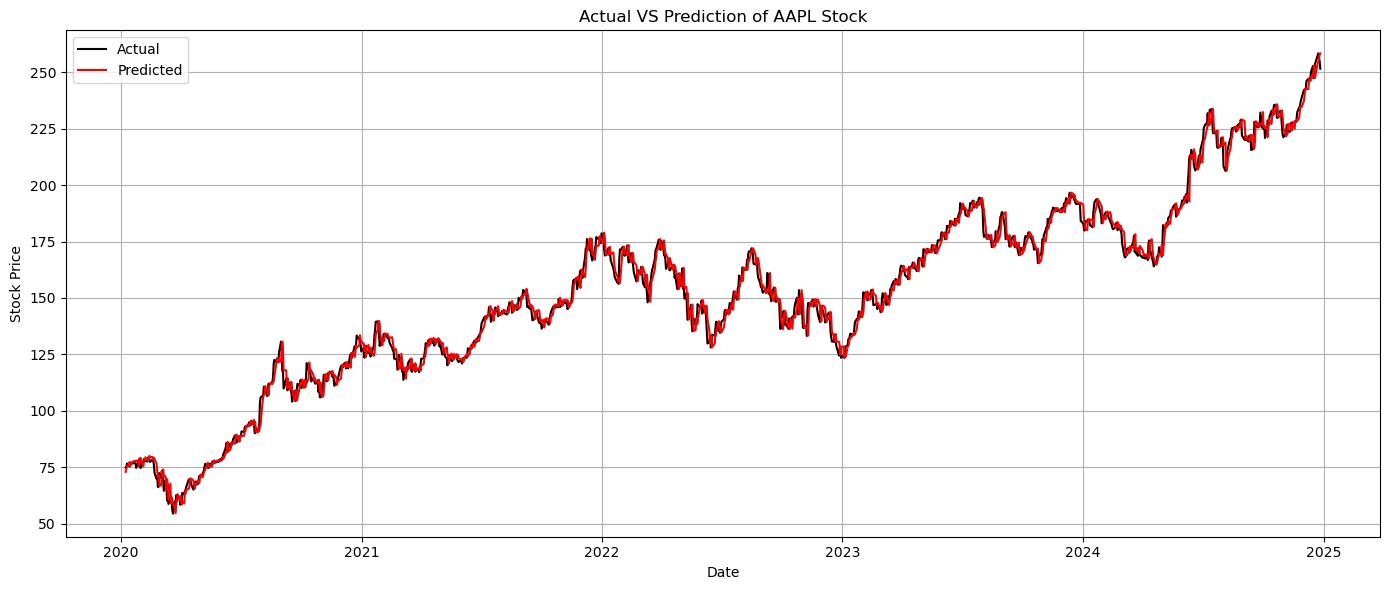

In [13]:
plt.figure(figsize=(14,6))
plt.plot(df_train_predict.index, df_train_predict['Actual'], label = 'Actual', color = 'black')
plt.plot(df_train_predict.index, df_train_predict['Predicted'], label = 'Predicted', color = 'red')
plt.title('Actual VS Prediction of AAPL Stock')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.grid()
plt.tight_layout()
plt.legend()
plt.show()

#### Testing all (5) Linear Regression assumptions

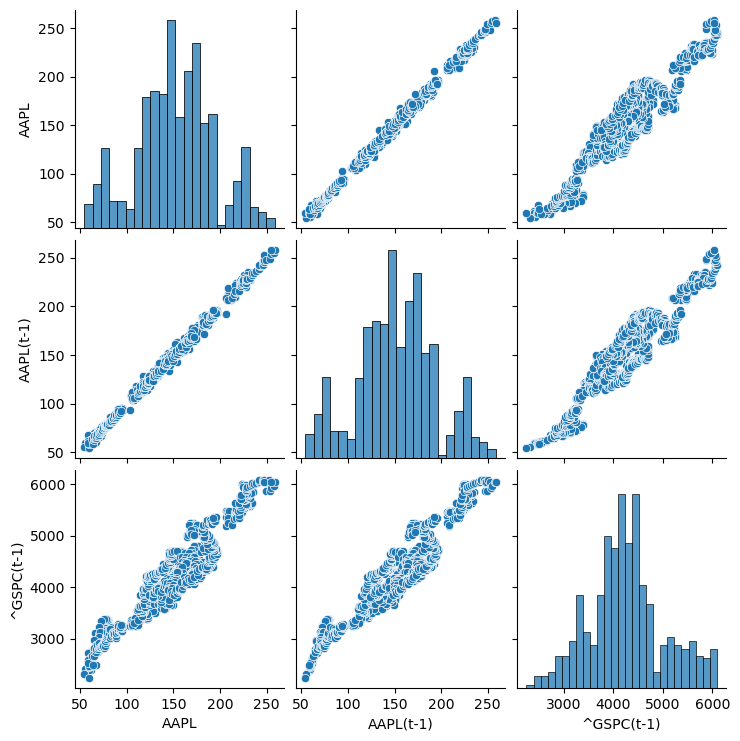

In [14]:
# Linearity between dependent and independent variables

df = df[['AAPL', 'AAPL(t-1)', '^GSPC(t-1)']]
sns.pairplot(df)

# From the  pairplot, we can conclude that there is a linear relationship between AAPL and AAPL(t-1)
# Likewise, there is a linear relationship between AAPL and S&P 500

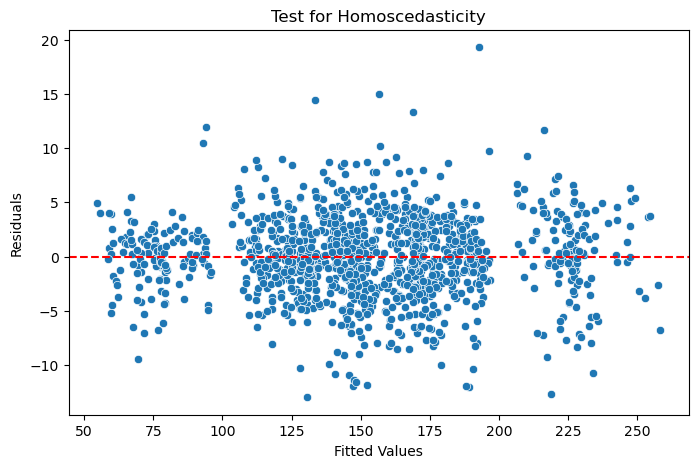

In [15]:
# Homoskedasticity: Fitting the residual with the predicted value

residual = model.resid # Actual - Predicted
fitted = model.fittedvalues # Predicted values
plt.figure(figsize=(8,5))
sns.scatterplot(x = fitted, y = residual)
plt.axhline(0, color ='red', linestyle = '--')
plt.title('Test for Homoscedasticity')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()

# From the plot, it can be observed that the residuals have contant variance; hence homoskedasticity assumption is satisfied

In [16]:
# Multicollinearity -> VIF (Variance Inflation Factor) -> for independent variables

# VIF Rules
# If VIF < 1, No multicollinearity
# If VIF < 10, Moderare multicollinearity
# If VIF > 10, Strong

# The Multicollinearity assumption is satisfied since VIF < 10

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = X_const.columns
vif['VIF'] = [variance_inflation_factor(X_const.values, i) for i in range(X_const.shape[1])]
vif = vif[1:]
vif

,Features,VIF
1,AAPL(t-1),7.634911
2,^GSPC(t-1),7.634911


<Axes: ylabel='Count'>

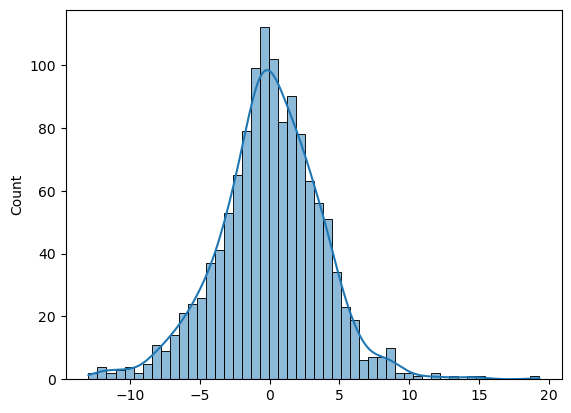

In [17]:
# Normality of Residual

# Testing with the normality Histogram (Visual Test)

# From the chart, the residuals are normally distributed hence the Normality assumption is satisfied

sns.histplot(data = residual, bins=50, kde=True)

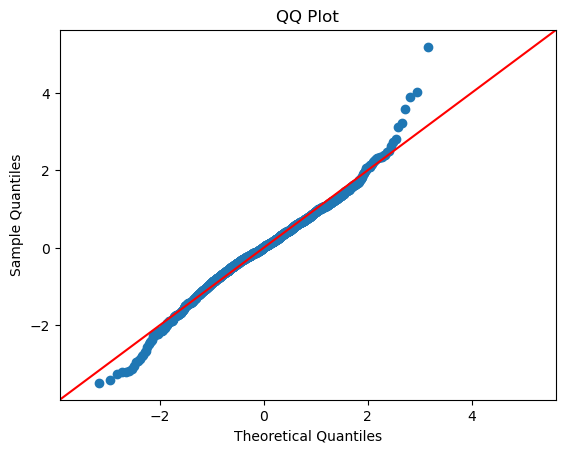

In [18]:
# Testing normality using QQ Plot

# Most of the residual quantiles lie close to the line of theoretical normal quantiles which is similar to a normal distribution
# The assumption is satisfied on QQ Plot

sm.qqplot(residual, line = '45', fit = True)
plt.title('QQ Plot')
plt.show()

In [19]:
# Autocorrelation of residual -> Durbin Watson Test

# If the Durbin Watson Test = 2, then there's no autocorrelation
# If the Durbin Watson Test < 2, then there exists a positive autocorrelation
# If the Durbin Watson Test > 2, then there exists a negative autocorrelation


from statsmodels.stats.stattools import durbin_watson
dw = durbin_watson(residual)
dw




1.0410074751101972

In [20]:
# Four (4) assumptions of Linear Regression Models have been satisfied
# Linearity - Satisfied
# Homoscedasticity - Satisfied
# Multicollinearity - Satisfied
# Normality of Residuals - Satisfied
# Auto correlation of Residual - Not Satisfied because the Durbin Watson Test is not equal to 2

### Predicting The Stock Price for 2025

In [21]:
tickers = ['AAPL', '^GSPC']
start_date = '2025-01-01'
end_date = '2025-03-31'

df = yf.download(tickers, start = start_date, end = end_date)['Close']
df.head()

[*********************100%***********************]  2 of 2 completed


Ticker,AAPL,^GSPC
Date,,
2025-01-02,243.263199,5868.549805
2025-01-03,242.774368,5942.470215
2025-01-06,244.410416,5975.379883
2025-01-07,241.627136,5909.029785
2025-01-08,242.115936,5918.250000


In [22]:
df['AAPL(t-1)'] = df['AAPL'].shift(1)
df['^GSPC(t-1)'] = df['^GSPC'].shift(1)
df = df.dropna()
df.head()

Ticker,AAPL,^GSPC,AAPL(t-1),^GSPC(t-1)
Date,,,,
2025-01-03,242.774368,5942.470215,243.263199,5868.549805
2025-01-06,244.410416,5975.379883,242.774368,5942.470215
2025-01-07,241.627136,5909.029785,244.410416,5975.379883
2025-01-08,242.115936,5918.250000,241.627136,5909.029785
2025-01-10,236.280029,5827.040039,242.115936,5918.250000


In [23]:
X_test = df[['AAPL(t-1)', '^GSPC(t-1)']]
X_test = sm.add_constant(X_test)
df_result = pd.DataFrame()
df_result['Actual'] = df['AAPL']
df_result['Predicted'] = model.predict(X_test)
df_result.head()

,Actual,Predicted
Date,,
2025-01-03,242.774368,243.390885
2025-01-06,244.410416,242.969536
2025-01-07,241.627136,244.605982
2025-01-08,242.115936,241.813660
2025-01-10,236.280029,242.302085


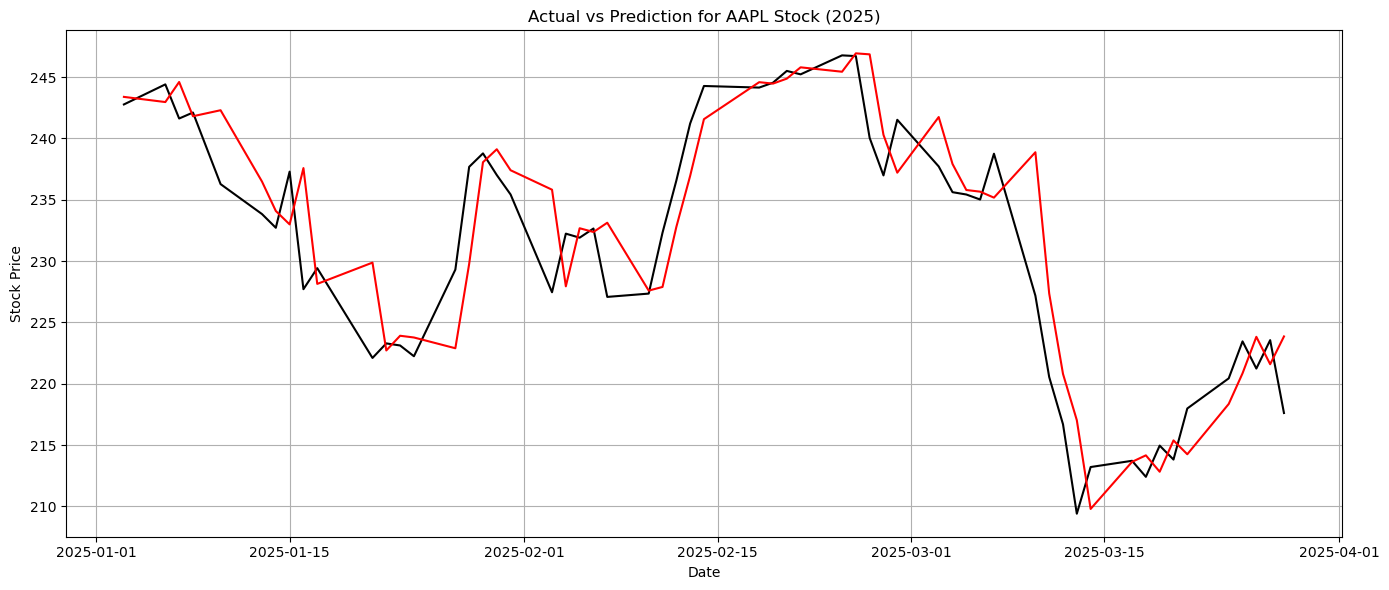

In [24]:
# Plot between Actual vs Predicted Value

plt.figure(figsize = (14,6))
plt.plot(df_result.index, df_result['Actual'], label = 'Actual', color = 'black')
plt.plot(df_result.index, df_result['Predicted'], label = 'Predicted', color = 'red')
plt.title("Actual vs Prediction for AAPL Stock (2025)")
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.grid(True)
plt.tight_layout()
plt.show()

In [25]:
# Risk Metrics
# Calculate RMSE and MSE
# RMSE = Root Mean Square Error => Sq root(Avg((A - P)^2))
# MSE = Mean Square Error => Avg((A - P)^2)
from sklearn.metrics import mean_squared_error

# Calculate mse
mse = mean_squared_error(df_result['Actual'], df_result['Predicted'])
rmse = np.sqrt(mse)
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")

Mean Squared Error (MSE): 17.3068
Root Mean Squared Error (RMSE): 4.1601


In [26]:
# Conclusion: It's a decent Model but not 100% Accurate
# Lesson: Stock data in general have lot of non linearities
# It's extremely tough to use simple linear regression model just to capture the non-linear effect
# That's why in the industry it's common to use Machine Learning Models which are great in caputuring non linearities


### LASSO Regression: L1 Regularization

In [27]:
# Download data from Yahoo Finance. 
tickers = ['AAPL', 'AMZN', 'MSFT', 'QQQ', '^GSPC']
start_date = '2020-01-01'
end_date = '2025-04-01'

df = yf.download(tickers, start = start_date, end = end_date)['Close']
df.head()

[*********************100%***********************]  5 of 5 completed


Ticker,AAPL,AMZN,MSFT,QQQ,^GSPC
Date,,,,,
2020-01-02,72.620834,94.900497,153.042267,209.325912,3257.850098
2020-01-03,71.914803,93.748497,151.136642,207.408508,3234.850098
2020-01-06,72.487846,95.143997,151.527298,208.744858,3246.280029
2020-01-07,72.146950,95.343002,150.145721,208.715805,3237.179932
2020-01-08,73.307533,94.598503,152.537292,210.284622,3253.050049


In [28]:
# Feature Engineering - Technical Indicators
# Lagged Features 
df['AAPL(t-1)'] = df['AAPL'].shift(1)
df['AMZN(t-1)'] = df['AMZN'].shift(1)
df['MSFT(t-1)'] = df['MSFT'].shift(1)
df['QQQ(t-1)'] = df['QQQ'].shift(1)
df['^GSPC(t-1)'] = df['^GSPC'].shift(1) # The shift(1) considers the previous day's value

# Moving Average
df['AAPL_MA_5'] = df['AAPL'].rolling(window=5).mean()
df['AMZN_MA_5'] = df['AMZN'].rolling(window=5).mean()
df['MSFT_MA_5'] = df['MSFT'].rolling(window=5).mean()
df['QQQ_MA_5'] = df['QQQ'].rolling(window=5).mean()
df['^GSPC_MA_5'] = df['^GSPC'].rolling(window=5).mean()


# Setting variable Y
df['Target'] = df['AAPL'].shift(-1) # The shift(-1) considers the next day's value
df = df.dropna()
df.head()

Ticker,AAPL,AMZN,MSFT,QQQ,^GSPC,AAPL(t-1),AMZN(t-1),MSFT(t-1),QQQ(t-1),^GSPC(t-1),AAPL_MA_5,AMZN_MA_5,MSFT_MA_5,QQQ_MA_5,^GSPC_MA_5,Target
Date,,,,,,,,,,,,,,,,
2020-01-08,73.307533,94.598503,152.537292,210.284622,3253.050049,72.146950,95.343002,150.145721,208.715805,3237.179932,72.495593,94.746899,151.677844,208.895941,3245.842041,74.864624
2020-01-09,74.864624,95.052498,154.442947,212.066437,3274.699951,73.307533,94.598503,152.537292,210.284622,3253.050049,72.944351,94.777299,151.957980,209.444046,3249.212012,75.033882
2020-01-10,75.033882,94.157997,153.728317,211.524155,3265.350098,74.864624,95.052498,154.442947,212.066437,3274.699951,73.568167,94.859200,152.476315,210.267175,3255.312012,76.636932
2020-01-13,76.636932,94.565002,155.576767,213.964447,3288.129883,75.033882,94.157997,153.728317,211.524155,3265.350098,74.397984,94.743401,153.286209,211.311093,3263.681982,75.602074
2020-01-14,75.602074,93.472000,154.481033,213.121964,3283.149902,76.636932,94.565002,155.576767,213.964447,3288.129883,75.089009,94.369200,154.153271,212.192325,3272.875977,75.278091


In [29]:
# Importing all the required libraries for regression analysis


from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score



In [30]:
# Define the features and target variable

X = df[['AAPL(t-1)', 'AMZN(t-1)',
       'MSFT(t-1)', 'QQQ(t-1)', '^GSPC(t-1)', 'AAPL_MA_5', 'AMZN_MA_5',
       'MSFT_MA_5', 'QQQ_MA_5', '^GSPC_MA_5']]

Y = df['Target']



In [31]:
# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.044, shuffle = False)

In [32]:
# Applying Lasso Regression
lasso = Lasso(alpha=10)  # You can adjust the alpha value for regularization strength
lasso.fit(X_train, Y_train) # Training the model


Lasso(alpha=10)

In [33]:
# Get the intercept and coefficients

coefficients = lasso.coef_
intercept = lasso.intercept_

coeff_df = pd.DataFrame({'Feature': X.columns, 'Coefficient': coefficients})
print("Lasso Regression Model")
print(coeff_df)


Lasso Regression Model
      Feature  Coefficient
0   AAPL(t-1)     0.581878
1   AMZN(t-1)    -0.000000
2   MSFT(t-1)     0.006747
3    QQQ(t-1)     0.000000
4  ^GSPC(t-1)     0.002428
5   AAPL_MA_5     0.356984
6   AMZN_MA_5    -0.000000
7   MSFT_MA_5     0.000000
8    QQQ_MA_5     0.000000
9  ^GSPC_MA_5     0.000000


In [34]:
# Prediction on the test set

Y_pred = lasso.predict(X_test)
Y_pred

array([244.64969071, 243.82254698, 244.17315256, 241.80581089,
       241.62876712, 237.33560925, 235.08914539, 234.13592016,
       236.10317179, 229.99331924, 230.3281003 , 225.51844039,
       225.40623445, 224.99921371, 224.41960186, 229.36202999,
       235.56370536, 237.09272451, 236.90047004, 235.77182364,
       230.60548408, 233.01014935, 232.57083237, 232.48068719,
       229.04737802, 229.32449889, 232.54434773, 235.56860806,
       239.66776135, 242.63585669, 243.47821746, 244.41939226,
       245.2139917 , 244.92270013, 245.9057667 , 245.44023724,
       240.96446201, 238.64376897, 240.8910123 , 237.57309476,
       235.85034354, 235.8396288 , 235.12322614, 236.59717421,
       228.31956001, 223.02207554, 219.03515586, 212.74989378,
       214.35385808, 214.1579029 , 213.09086596, 215.06406355,
       214.70570999, 217.64993781, 220.12321078, 222.36273878,
       221.57640113, 222.85644748])

In [35]:
# Creating a DataFrame to compare actual vs predicted values

df_result = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_pred})
df_result.head()


,Actual,Predicted
Date,,
2025-01-03,244.410416,244.649691
2025-01-06,241.627136,243.822547
2025-01-07,242.115936,244.173153
2025-01-08,236.280029,241.805811
2025-01-10,233.835922,241.628767


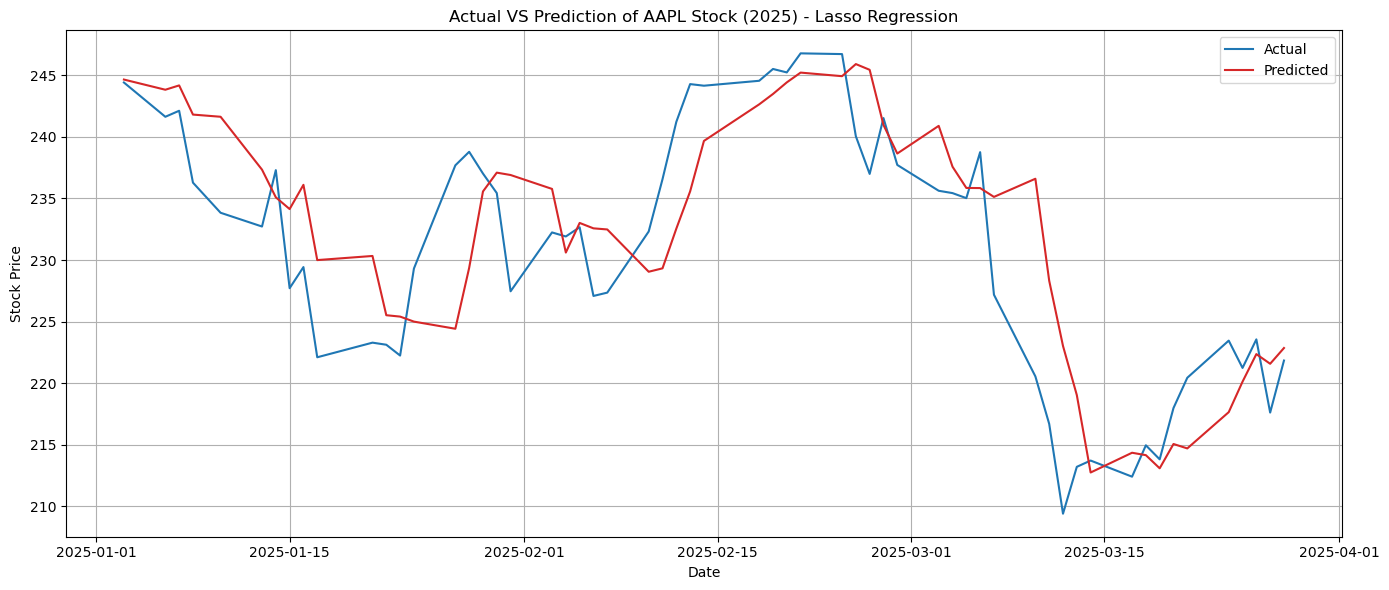

In [36]:
# Plotting Actual vs Predicted values
plt.figure(figsize=(14,6))
plt.plot(df_result.index, df_result['Actual'], label = 'Actual', color = 'tab:blue')
plt.plot(df_result.index, df_result['Predicted'], label = 'Predicted', color = 'tab:red')
plt.title('Actual VS Prediction of AAPL Stock (2025) - Lasso Regression')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.grid()
plt.tight_layout()
plt.legend()
plt.show()

In [37]:
# Evaluating the model performance using R-squared, MSE, and RMSE

r2 = r2_score(Y_test, Y_pred)
mse = mean_squared_error(Y_test, Y_pred)
rmse = np.sqrt(mse)
print(f"R-squared: {r2:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
# Conclusion: The Lasso Regression model has been trained and evaluated.


R-squared: 0.6746
Mean Squared Error (MSE): 33.7956
Root Mean Squared Error (RMSE): 5.8134


### Ridge Regression: L2 Regularization

In [38]:
# Importing all necessary libraries for regression analysis
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [39]:
# Define the features and target variable

X = df[['AAPL(t-1)', 'AMZN(t-1)',
       'MSFT(t-1)', 'QQQ(t-1)', '^GSPC(t-1)', 'AAPL_MA_5', 'AMZN_MA_5',
       'MSFT_MA_5', 'QQQ_MA_5', '^GSPC_MA_5']]

Y = df['Target']


In [40]:
# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.044, shuffle = False)

In [41]:
# Applying Ridge Regression

ridge = Ridge(alpha=10)  # You can adjust the alpha value for regularization strength
ridge.fit(X_train, Y_train) # Training the model


Ridge(alpha=10)

In [42]:
# Get the intercept and coefficients

coefficients = ridge.coef_
intercept = ridge.intercept_

coeff_df = pd.DataFrame({'Feature': X.columns, 'Coefficient': coefficients})
print("Ridge Regression Model")
print(coeff_df)

Ridge Regression Model
      Feature  Coefficient
0   AAPL(t-1)     0.467923
1   AMZN(t-1)     0.062431
2   MSFT(t-1)    -0.014941
3    QQQ(t-1)     0.014676
4  ^GSPC(t-1)     0.005412
5   AAPL_MA_5     0.513141
6   AMZN_MA_5    -0.058205
7   MSFT_MA_5     0.028304
8    QQQ_MA_5    -0.016651
9  ^GSPC_MA_5    -0.005715


In [43]:
# Prediction on the test set

Y_pred = ridge.predict(X_test)
Y_pred

array([245.45903833, 244.773546  , 244.90402783, 241.98328466,
       241.58975257, 237.41067321, 235.35124566, 234.34818653,
       235.95508604, 230.23562772, 230.15957339, 226.00604838,
       225.13957183, 224.41104933, 223.78118464, 228.16253397,
       234.11073496, 235.80387475, 236.68860662, 235.61947738,
       230.84947553, 232.77708149, 231.87677414, 231.74208303,
       228.13590851, 228.85016215, 231.69677292, 234.28426113,
       238.59338305, 241.66363765, 242.77780957, 243.89701665,
       244.61439067, 244.11267326, 245.05429244, 244.77372333,
       241.31657417, 238.65592893, 240.85149175, 237.18962273,
       235.49588258, 236.04744867, 234.78551079, 236.06347425,
       228.23415649, 223.45708965, 219.64214353, 212.9959293 ,
       214.23528394, 213.74237994, 212.36364398, 214.37053226,
       214.21337845, 216.71588011, 219.77311677, 221.93213109,
       221.10492025, 222.1201626 ])

In [44]:
# Creating a DataFrame to compare actual vs predicted values

df_result = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_pred})
df_result.head()

,Actual,Predicted
Date,,
2025-01-03,244.410416,245.459038
2025-01-06,241.627136,244.773546
2025-01-07,242.115936,244.904028
2025-01-08,236.280029,241.983285
2025-01-10,233.835922,241.589753


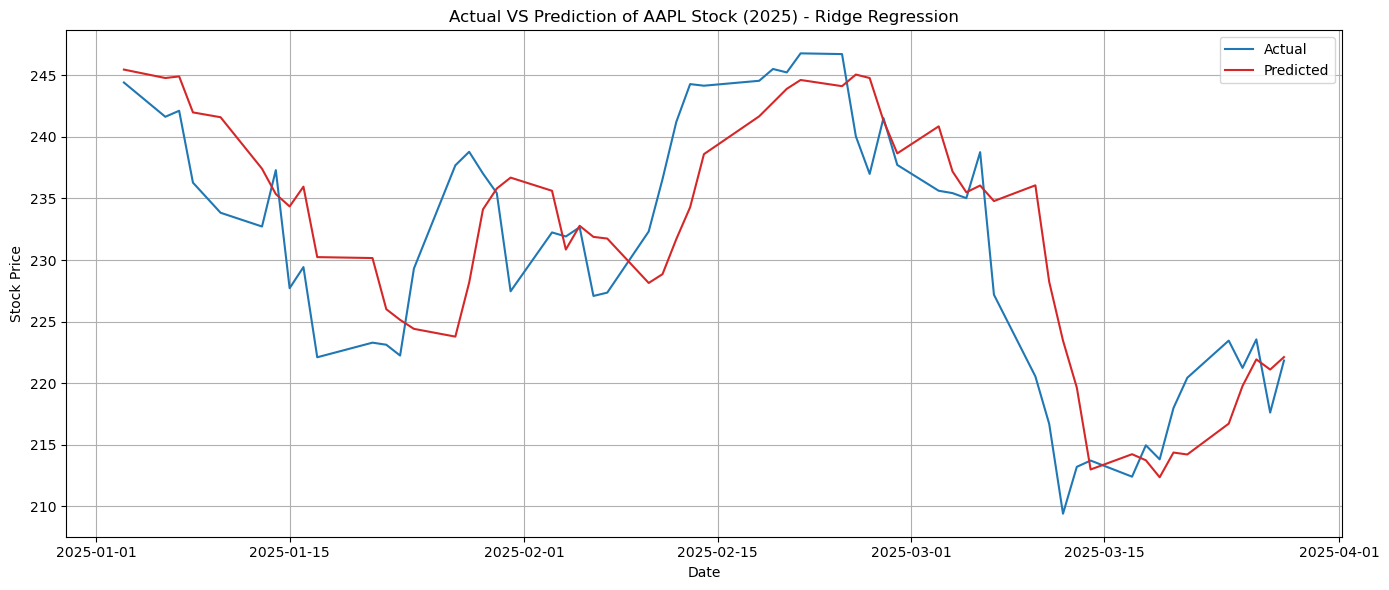

In [45]:
# Plotting Actual vs Predicted values
plt.figure(figsize=(14,6))
plt.plot(df_result.index, df_result['Actual'], label = 'Actual', color = 'tab:blue')
plt.plot(df_result.index, df_result['Predicted'], label = 'Predicted', color = 'tab:red')
plt.title('Actual VS Prediction of AAPL Stock (2025) - Ridge Regression')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.grid()
plt.tight_layout()
plt.legend()
plt.show()

In [46]:
# Evaluating the model performance using R-squared, MSE, and RMSE

r2 = r2_score(Y_test, Y_pred)
mse = mean_squared_error(Y_test, Y_pred)
rmse = np.sqrt(mse)
print(f"R-squared: {r2:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
# Conclusion: The Ridge Regression model has been trained and evaluated.

R-squared: 0.6552
Mean Squared Error (MSE): 35.8050
Root Mean Squared Error (RMSE): 5.9837


### Elastic Net Regression: L1 + L2 Regularization

In [47]:
# Importing all necessary libraries for regression analysis
from sklearn.linear_model import ElasticNet

In [48]:
# Define the features and target variable
X = df[['AAPL(t-1)', 'AMZN(t-1)',
       'MSFT(t-1)', 'QQQ(t-1)', '^GSPC(t-1)', 'AAPL_MA_5', 'AMZN_MA_5',
       'MSFT_MA_5', 'QQQ_MA_5', '^GSPC_MA_5']]

Y = df['Target']

In [49]:
# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.044, shuffle = False)

In [50]:
# Applying Elastic Net Regression
elastic_net = ElasticNet(alpha=10, l1_ratio=0.5)  # l1_ratio=0.5 means equal mix of Lasso and Ridge
elastic_net.fit(X_train, Y_train) # Training the model

c:\Users\POSTE\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.836e+02, tolerance: 2.204e+02
  model = cd_fast.enet_coordinate_descent(


ElasticNet(alpha=10)

In [51]:
# Get the intercept and coefficients
coefficients = elastic_net.coef_
intercept = elastic_net.intercept_

coeff_df = pd.DataFrame({'Feature': X.columns, 'Coefficient': coefficients})
print("Elastic Net Regression Model")
print(coeff_df)

Elastic Net Regression Model
      Feature  Coefficient
0   AAPL(t-1)     0.460190
1   AMZN(t-1)    -0.000000
2   MSFT(t-1)     0.000000
3    QQQ(t-1)     0.000000
4  ^GSPC(t-1)     0.004056
5   AAPL_MA_5     0.485344
6   AMZN_MA_5    -0.000000
7   MSFT_MA_5     0.012422
8    QQQ_MA_5     0.000000
9  ^GSPC_MA_5    -0.002518


In [52]:
# Prediction on the test set
Y_pred = elastic_net.predict(X_test)
Y_pred

array([245.19287614, 244.23334615, 244.14519872, 241.83679881,
       241.44310955, 237.55814325, 235.37228257, 234.45414019,
       235.58746522, 230.39896734, 230.21113272, 226.09259647,
       225.37896067, 224.86711459, 224.38645444, 228.82547469,
       234.42453611, 236.10872785, 236.66433314, 235.58138917,
       231.1269931 , 232.75143453, 232.26830203, 231.88588246,
       229.04245901, 229.32022645, 232.05829962, 234.74598153,
       238.7650294 , 241.76655649, 242.92513339, 244.02325817,
       244.79375634, 244.54121299, 245.44222875, 244.92335103,
       241.10005294, 238.95250276, 240.56547739, 237.37857952,
       235.73560453, 235.79163004, 234.99607496, 235.91846607,
       228.58124816, 223.61713932, 219.53136744, 213.43545284,
       214.34666061, 213.92388622, 212.88092926, 214.67610047,
       214.55754016, 217.10968006, 219.66537677, 221.6866698 ,
       221.34410384, 222.31058262])

In [53]:
# Creating a DataFrame to compare actual vs predicted values
df_result = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_pred})
df_result.head()

,Actual,Predicted
Date,,
2025-01-03,244.410416,245.192876
2025-01-06,241.627136,244.233346
2025-01-07,242.115936,244.145199
2025-01-08,236.280029,241.836799
2025-01-10,233.835922,241.443110


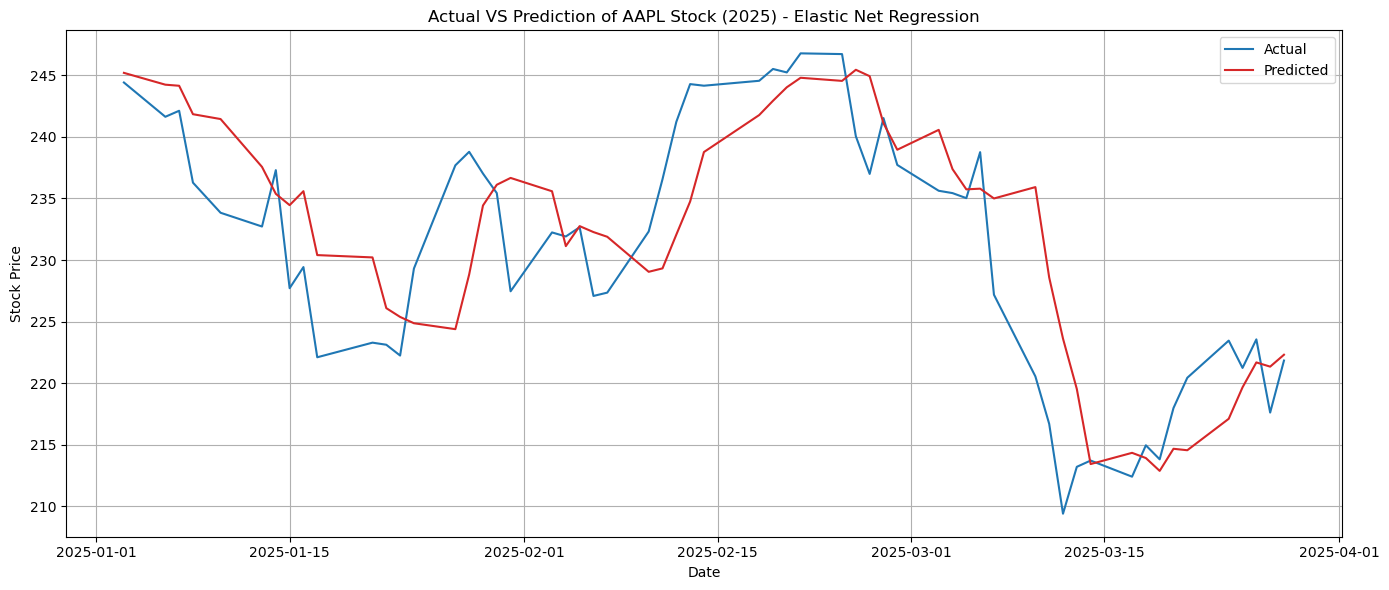

In [54]:
# Plotting Actual vs Predicted values
plt.figure(figsize=(14,6))
plt.plot(df_result.index, df_result['Actual'], label = 'Actual', color = 'tab:blue')
plt.plot(df_result.index, df_result['Predicted'], label = 'Predicted', color = 'tab:red')
plt.title('Actual VS Prediction of AAPL Stock (2025) - Elastic Net Regression')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.grid()
plt.tight_layout()
plt.legend()
plt.show()

In [55]:
# Evaluating the model performance using R-squared, MSE, and RMSE
r2 = r2_score(Y_test, Y_pred)
mse = mean_squared_error(Y_test, Y_pred)
rmse = np.sqrt(mse)
print(f"R-squared: {r2:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
# Conclusion: The Ridge Regression model has been trained and evaluated.

R-squared: 0.6667
Mean Squared Error (MSE): 34.6189
Root Mean Squared Error (RMSE): 5.8838


### Performance Comparison of all the Regression Models

In [56]:
# OLS Regression Model

# R squared: 0.993
# Mean Squared Error (MSE): 17.3068
# Root Mean Squared Error (RMSE): 4.1601


# Lasso Regression Model

# R-squared: 0.6746
# Mean Squared Error (MSE): 33.7956
# Root Mean Squared Error (RMSE): 5.8134


# Ridge Regression Model

# R-squared: 0.6552
# Mean Squared Error (MSE): 35.8050
# Root Mean Squared Error (RMSE): 5.9837


# Elastic Net Regression Model

# R-squared: 0.6667
# Mean Squared Error (MSE): 34.6189
# Root Mean Squared Error (RMSE): 5.8838

### End of project